In [ ]:
# importações
import pandas as pd

import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# dataframe
df = pd.read_csv("https://raw.githubusercontent.com/zhangzhao156/Human-Activity-Recognition-Codes-Datasets/master/data/SanitationDataset/sanitation.csv")

In [ ]:
df

,x,y,z,label,seg,suspicious
0,20,781,-507,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
1,40,797,-492,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
2,59,807,-502,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
3,75,807,-527,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
4,107,806,-560,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
...,...,...,...,...,...,...
266550,-941,174,337,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266551,-942,173,314,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266552,-916,158,310,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266553,-898,145,304,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False


In [ ]:
# armazenando os valores de label
labels = df["label"].unique()

In [ ]:
# dataframe que ira armazenar os valores das features dos calculadas
df_trat = pd.DataFrame()

In [ ]:
# tempo de execução médio do código: 9 minutos
# for de iteração de cada label do dataframe
for lb in range(0, len(labels)):
  # tratando os dados: separando as linhas de cada label, split do ultimo numero da janela, retirando a coluna antiga da janela e inserindo a nova, armazenando os valores de cada janela
  dfSplited = df[df["label"] == labels[lb]]
  lastNDfSplited = dfSplited["seg"].squeeze()
  lastNDfSplited = lastNDfSplited.str.rsplit("-", n=1, expand=True)
  lastNDfSplited.rename(columns={0: 'seg', 1: 'random'}, inplace=True)
  dfSplited = dfSplited.drop(columns=['seg'])
  dfSplited = pd.concat([dfSplited, lastNDfSplited], axis=1)
  dfSplited = dfSplited[['x', 'y', 'z', 'label', 'seg', 'random', 'suspicious']]
  windowsDfSplited = dfSplited["random"].unique()

  cont = 0

  # for de iteração de cada janela de cada label do dataframe
  for window in range(len(df_trat), len(df_trat) + len(windowsDfSplited)):
    # calculando as features: maximo, minimo, binomial, media, mediana, variancia, desvp, mad
    df_trat.loc[window, 'maxX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.max()
    df_trat.loc[window, 'minX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.min()
    df_trat.loc[window, 'binX'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].x.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].x.min()) / 10
    df_trat.loc[window, 'medX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.mean()
    df_trat.loc[window, 'mediX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.median()
    df_trat.loc[window, 'varX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.var()
    df_trat.loc[window, 'desvX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.std()
    df_trat.loc[window, 'madX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.mad()

    df_trat.loc[window, 'maxY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.max()
    df_trat.loc[window, 'minY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.min()
    df_trat.loc[window, 'binnY'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].y.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].y.min()) / 10
    df_trat.loc[window, 'medY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.mean()
    df_trat.loc[window, 'mediY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.median()
    df_trat.loc[window, 'varY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.var()
    df_trat.loc[window, 'desvY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.std()
    df_trat.loc[window, 'madY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.mad()

    df_trat.loc[window, 'maxZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.max()
    df_trat.loc[window, 'minZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.min()
    df_trat.loc[window, 'binZ'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].z.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].z.min()) / 10
    df_trat.loc[window, 'medZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.mean()
    df_trat.loc[window, 'mediZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.median()
    df_trat.loc[window, 'varZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.var()
    df_trat.loc[window, 'desvZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.std()
    df_trat.loc[window, 'madZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.mad()

    cont+=1

df_trat

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,desvY,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ
0,143.0,-128.0,27.1,-42.970588,-77.0,6320.655838,79.502552,68.980104,896.0,696.0,...,41.808334,33.126298,-460.0,-691.0,23.1,-536.161765,-531.0,2895.421203,53.809118,43.117215
1,-88.0,-143.0,5.5,-109.395349,-105.0,246.339978,15.695221,13.482964,961.0,843.0,...,32.402183,28.484586,-159.0,-445.0,28.6,-312.511628,-322.0,8310.589147,91.162433,80.174148
2,15.0,-61.0,7.6,-24.238095,-30.0,319.795587,17.882829,15.204082,1006.0,951.0,...,12.633515,9.793651,-10.0,-134.0,12.4,-52.738095,-40.5,1344.783391,36.671288,31.379819
3,-59.0,-160.0,10.1,-120.176471,-128.0,559.550483,23.654819,20.008651,1016.0,851.0,...,36.453378,28.766003,-58.0,-455.0,39.7,-213.500000,-186.5,9542.522388,97.685835,83.250000
4,1053.0,-130.0,118.3,517.697674,631.0,215070.930233,463.757405,431.114116,772.0,77.0,...,170.741533,139.366144,137.0,-835.0,97.2,-473.325581,-577.0,94687.796235,307.713822,269.156301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,737.0,621.0,11.6,681.467742,679.0,431.597303,20.774920,16.239854,371.0,271.0,...,24.780138,20.555671,729.0,619.0,11.0,673.370968,679.0,912.302750,30.204350,26.528616
4390,804.0,661.0,14.3,730.326531,734.0,1335.016156,36.537873,30.211579,421.0,288.0,...,40.599797,35.099542,700.0,518.0,18.2,599.265306,588.0,3028.698980,55.033617,46.202416
4391,1078.0,404.0,67.4,756.268293,763.0,23795.501220,154.257905,104.638905,428.0,-146.0,...,141.282868,112.424747,794.0,315.0,47.9,623.268293,646.0,10985.351220,104.811026,71.633551
4392,1126.0,581.0,54.5,771.577465,757.0,7817.676056,88.417623,47.450506,465.0,35.0,...,74.628971,50.536005,726.0,396.0,33.0,598.732394,611.0,4019.170221,63.396926,42.271771


In [ ]:
df_trat

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,desvY,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ
0,143.0,-128.0,27.1,-42.970588,-77.0,6320.655838,79.502552,68.980104,896.0,696.0,...,41.808334,33.126298,-460.0,-691.0,23.1,-536.161765,-531.0,2895.421203,53.809118,43.117215
1,-88.0,-143.0,5.5,-109.395349,-105.0,246.339978,15.695221,13.482964,961.0,843.0,...,32.402183,28.484586,-159.0,-445.0,28.6,-312.511628,-322.0,8310.589147,91.162433,80.174148
2,15.0,-61.0,7.6,-24.238095,-30.0,319.795587,17.882829,15.204082,1006.0,951.0,...,12.633515,9.793651,-10.0,-134.0,12.4,-52.738095,-40.5,1344.783391,36.671288,31.379819
3,-59.0,-160.0,10.1,-120.176471,-128.0,559.550483,23.654819,20.008651,1016.0,851.0,...,36.453378,28.766003,-58.0,-455.0,39.7,-213.500000,-186.5,9542.522388,97.685835,83.250000
4,1053.0,-130.0,118.3,517.697674,631.0,215070.930233,463.757405,431.114116,772.0,77.0,...,170.741533,139.366144,137.0,-835.0,97.2,-473.325581,-577.0,94687.796235,307.713822,269.156301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,737.0,621.0,11.6,681.467742,679.0,431.597303,20.774920,16.239854,371.0,271.0,...,24.780138,20.555671,729.0,619.0,11.0,673.370968,679.0,912.302750,30.204350,26.528616
4390,804.0,661.0,14.3,730.326531,734.0,1335.016156,36.537873,30.211579,421.0,288.0,...,40.599797,35.099542,700.0,518.0,18.2,599.265306,588.0,3028.698980,55.033617,46.202416
4391,1078.0,404.0,67.4,756.268293,763.0,23795.501220,154.257905,104.638905,428.0,-146.0,...,141.282868,112.424747,794.0,315.0,47.9,623.268293,646.0,10985.351220,104.811026,71.633551
4392,1126.0,581.0,54.5,771.577465,757.0,7817.676056,88.417623,47.450506,465.0,35.0,...,74.628971,50.536005,726.0,396.0,33.0,598.732394,611.0,4019.170221,63.396926,42.271771


In [ ]:
# nomeando a coluna label com as respectivas labels das linhas do dataframe das features
df_trat.loc[0:170, 'label'] = 'walk'
df_trat.loc[171:1423, 'label'] = 'bweep' 
df_trat.loc[1424:2007, 'label'] = 'clean'
df_trat.loc[2008:2970, 'label'] = 'sweep' 
df_trat.loc[2971:3840, 'label'] = 'daily'
df_trat.loc[3841:4316, 'label'] = 'dump'
df_trat.loc[4317:4393, 'label'] = 'run'

In [ ]:
# arredondando os valores das features
df_trat = df_trat.round(2)

bweep = 0
clean = 1
daily = 2
dump = 3
run = 4
sweep = 5
walk = 6

In [ ]:
df_trat["label"] = df_trat["label"].astype('category')
df_trat["label"] = df_trat["label"].cat.codes

In [ ]:
# embaralhando os dados
df_shuffled = df_trat.sample(frac=1).reset_index(drop=True)
df_shuffled

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ,label
0,-238.0,-1491.0,125.3,-844.60,-809.0,101121.52,318.00,264.11,960.0,-431.0,...,213.11,699.0,-807.0,150.6,-75.80,-104.0,91227.73,302.04,235.61,5
1,1398.0,-1161.0,255.9,-122.76,-697.0,814334.11,902.40,861.96,449.0,-386.0,...,146.77,594.0,-1035.0,162.9,-226.02,-450.0,231821.78,481.48,444.38,0
2,-305.0,-1503.0,119.8,-1011.85,-1018.0,81768.81,285.95,228.96,615.0,-655.0,...,245.81,845.0,-109.0,95.4,457.67,468.5,71816.83,267.99,211.62,0
3,429.0,-1227.0,165.6,-710.89,-846.0,152186.60,390.11,281.39,833.0,246.0,...,158.71,228.0,-583.0,81.1,-94.12,-6.0,51839.18,227.68,194.02,0
4,-619.0,-1325.0,70.6,-978.36,-955.0,41109.03,202.75,172.79,258.0,-51.0,...,72.67,286.0,-137.0,42.3,98.41,111.0,11013.27,104.94,85.10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,-289.0,-1270.0,98.1,-868.09,-904.5,49412.80,222.29,167.81,821.0,-147.0,...,195.09,106.0,-1415.0,152.1,-497.20,-397.0,125455.37,354.20,280.53,5
4390,197.0,-574.0,77.1,-260.06,-255.0,28004.70,167.35,130.56,1372.0,203.0,...,209.57,975.0,-811.0,178.6,77.56,103.0,213336.12,461.88,373.98,2
4391,402.0,-1481.0,188.3,-369.56,-156.0,362148.22,601.79,510.81,954.0,-37.0,...,230.22,983.0,-1120.0,210.3,-38.62,78.0,479762.91,692.65,631.05,3
4392,-569.0,-1334.0,76.5,-908.40,-894.0,42845.47,206.99,174.61,764.0,-898.0,...,330.87,-303.0,-928.0,62.5,-544.12,-494.0,27772.74,166.65,141.52,0


In [ ]:
df_input = df_shuffled.iloc[:,0:23]
df_output = df_shuffled.iloc[:,24]
X = df_input.values
Y = df_output.values

In [ ]:
smt = SMOTE()

In [ ]:
X, Y = smt.fit_resample(X, Y)

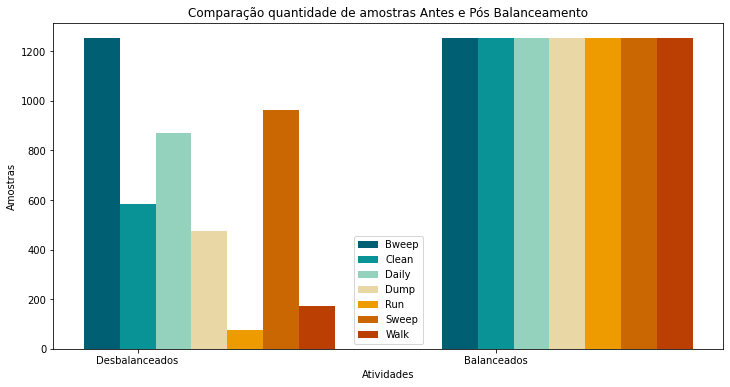

In [ ]:
#Quantidades
qtd0 = [len(df_trat[df_trat["label"] == 0]), len(X[Y == 0])]
qtd1 = [len(df_trat[df_trat["label"] == 1]), len(X[Y == 1])]
qtd2 = [len(df_trat[df_trat["label"] == 2]), len(X[Y == 2])]
qtd3 = [len(df_trat[df_trat["label"] == 3]), len(X[Y == 3])]
qtd4 = [len(df_trat[df_trat["label"] == 4]), len(X[Y == 4])]
qtd5 = [len(df_trat[df_trat["label"] == 5]), len(X[Y == 5])]
qtd6 = [len(df_trat[df_trat["label"] == 6]), len(X[Y == 6])]

# Tamanho das barras
barWidth = 0.1

# Tamanho da figura
plt.figure(figsize=(12,6))

# Posição das barras
r0 = np.arange(len(qtd0))
r1 = [x + barWidth for x in r0]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Criando as barras
plt.bar(r0, qtd0, color="#005f73", width=barWidth, label="Bweep")
plt.bar(r1, qtd1, color="#0a9396", width=barWidth, label="Clean")
plt.bar(r2, qtd2, color="#94d2bd", width=barWidth, label="Daily")
plt.bar(r3, qtd3, color="#e9d8a6", width=barWidth, label="Dump")
plt.bar(r4, qtd4, color="#ee9b00", width=barWidth, label="Run")
plt.bar(r5, qtd5, color="#ca6702", width=barWidth, label="Sweep")
plt.bar(r6, qtd6, color="#bb3e03", width=barWidth, label="Walk")

# Adicionando legenda as barras
plt.xlabel('Atividades')
plt.xticks([r + barWidth for r in range(len(qtd0))], ['Desbalanceados', 'Balanceados'])
plt.ylabel('Amostras')
plt.title('Comparação quantidade de amostras Antes e Pós Balanceamento')

# Legenda e exibindo o gráfico
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=5)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# KNN

## Teste do algoritmo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
# treinando o modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# predição dos valores do conjunto de teste
y_pred = knn.predict(X_test)
len(y_pred)

2632

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision Test:",metrics.precision_score(y_test,y_pred))
# print("Recall Test:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.916033434650456


In [ ]:
f1_score(y_test, y_pred, average='weighted') 

0.9159294676230708

In [ ]:
# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", metrics.classification_report(y_test, y_pred))

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       352
           1       0.90      0.92      0.91       385
           2       0.94      0.87      0.90       409
           3       0.88      0.92      0.90       368
           4       0.97      0.99      0.98       373
           5       0.92      0.89      0.91       385
           6       0.97      0.98      0.97       360

    accuracy                           0.92      2632
   macro avg       0.92      0.92      0.92      2632
weighted avg       0.92      0.92      0.92      2632



In [ ]:
# matriz de confusão
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['    Predito'], margins=True))

    Predito    0    1    2    3    4    5    6   All
Real                                                
0            297   12    9   15    0   17    2   352
1             12  355    6    7    5    0    0   385
2             11   20  355   11    2    4    6   409
3             11    3    3  340    1    8    2   368
4              0    2    0    3  368    0    0   373
5             24    4    4    8    0  343    2   385
6              1    0    2    2    2    0  353   360
All          356  396  379  386  378  372  365  2632


In [ ]:
accuracys = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracys.append(metrics.accuracy_score(y_test, pred_i))

In [ ]:
accuracys

[0.9422492401215805,
 0.9327507598784195,
 0.9262917933130699,
 0.925531914893617,
 0.9179331306990881,
 0.9194528875379939,
 0.915273556231003,
 0.9164133738601824,
 0.9122340425531915]

Text(0, 0.5, 'Accuracy')

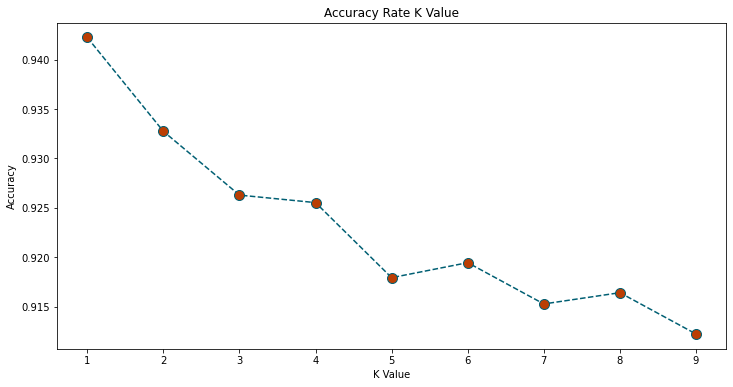

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), accuracys, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

In [ ]:
# validação cruzada
num_folds = 5
scores = cross_val_score(knn, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.88762215, 0.89495114, 0.8990228 , 0.90309446, 0.89568052])

In [ ]:
stdevCross = scores.std()
stdevCross

0.005115305152982905

## Avaliação mudança de atividade

1. Escolher uma amostra de um tipo de atividade qualquer e rodar a avaliação do algoritmo.

2. Sortear um numero com probabilidade de 10% para um numero e 90% para outra, caso caia nos 10% escolher uma outra amostra de uma atividade diferente, do contrário escolher outra amostra com a mesma atividade.

3. Rodar a avaliação do algoritmo.

4. Repetir os passos com o restante das amostras.

5. Ao final, analizar as métricas.

> Sequencia de uma atividade - marcar mudança como False

- Algoritmo identificar como atividade diferente (mudança de atividade para o algoritmo) marcar como FN
- Algoritmo identificar como mesma atividade (não mudança de atividade para o algoritmo) marcar como TP

> Mudança de atividade - marcar mudança como True

- Algoritmo identificar como atividade diferente (mudança de atividade para o algoritmo) marcar como TN
- Algoritmo identificar como mesma atividade (não mudança de atividade para o algoritmo) marcar como FP

In [ ]:
copyX_test = X_test
copyY_test = y_test

In [ ]:
# tempo de execução médio do código: 5 minutos
accuracys = []
FPs = []
FNs = []
trues = []
predictions = []
# for i in np.arange(0.1, 1, 0.1):
# labels = [0, 1, 2, 3, 4, 5, 6]
labels = df_shuffled["label"].unique().tolist()

TP = 0
TN = 0
FP = 0
FN = 0

formerLabel = 0
formerPrediction = 0

initialRandomLabel = random.choice(labels) # Label aleatória inicial

positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
positionsCurrentCopyYTest = positionsInitialCopyYTest

initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

positionsLabelsHistoric = []


initialPrediction = knn.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
currentPrediction = initialPrediction

positionsLabelsHistoric.append(initialPositionLabel)

# loop da analise que ira iterar cada amostra do conjunto de amostras
while True:
  if len(labels) == 1:
    positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

    positions = positionsCurrentCopyYTest[0].tolist()

    # subtrair arrays
    for a in positionsLabelsHistoric: 
      if a in positions: 
        positions.remove(a)

    newPositionLabel = random.choice(positions)
    positionsLabelsHistoric.append(newPositionLabel)

    formerPrediction = currentPrediction

    currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
    if currentPrediction == formerPrediction:
      FP = FP + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])
    else:
      TN = TN + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])


    for positionLabel in positions:
      formerPrediction = currentPrediction

      currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
      if currentPrediction == formerPrediction:
        TP = TP + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])
      else:
        FN = FN + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])

    positions = []
  else:
    randomNumber = random.random()

    # Analisando nova amostra da mesma atividade 
    if randomNumber > 0.1:
      # transformando as posições da label que estao em tupla para lista
      positions = positionsCurrentCopyYTest[0].tolist()

      # subtrair arrays
      for a in positionsLabelsHistoric: 
        if a in positions: 
          positions.remove(a)

      if positions == []:
        while positions == []:
          formerLabel = currentRandomLabel
          labels.remove(formerLabel)

          currentRandomLabel = random.choice(labels)

          positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

          positions = positionsCurrentCopyYTest[0].tolist()

          for a in positionsLabelsHistoric: 
            if a in positions: 
              positions.remove(a)

        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          FP = FP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
        else:
          TN = TN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])

      newPositionLabel = random.choice(positions)
      positionsLabelsHistoric.append(newPositionLabel)

      formerPrediction = currentPrediction

      currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
      if currentPrediction == formerPrediction:
        TP = TP + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])
      else:
        FN = FN + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])

    # Analise de uma nova amostra de atividade diferente
    if randomNumber < 0.1:
      # armazenando a antiga label e removendo a mesma temporariamente do array de labels
      formerLabel = currentRandomLabel
      labels.remove(formerLabel)

      # if de len label == 1
      if len(labels) == 1:
        positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

        positions = positionsCurrentCopyYTest[0].tolist()

        # subtrair arrays
        for a in positionsLabelsHistoric: 
          if a in positions: 
            positions.remove(a)

        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          FP = FP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
        else:
          TN = TN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])

        for positionLabel in positions:
          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            TP = TP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            FN = FN + 1      
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])


        positions = []
      else:
        # Randomizando uma nova label
        currentRandomLabel = random.choice(labels)
        # NDArray com as posições da nova label e randomização da posição aleatoria
        positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

        positions = positionsCurrentCopyYTest[0].tolist()

        # subtrair arrays
        for a in positionsLabelsHistoric: 
          if a in positions: 
            positions.remove(a)

        if positions == []:
          while positions == []:
            formerLabel = currentRandomLabel
            labels.remove(formerLabel)

            currentRandomLabel = random.choice(labels)

            positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

            positions = positionsCurrentCopyYTest[0].tolist()

            for a in positionsLabelsHistoric: 
              if a in positions: 
                positions.remove(a)

          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
        else:
          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])

          # devolvendo a label antiga ao array de labels
          labels.insert(formerLabel - 1, formerLabel)

  if positions == []:
    break

print(FP)
print(FN)
print(TP)
print(TN)

accuracy = (TP + TN)/(TP + TN + FP + FN)
# accuracys.append(accuracy)
# FPs.append(FP)
# FNs.append(FN)



8
342
1948
249


In [ ]:
# matriz de confusão
print(pd.crosstab(np.array(trues), np.array(predictions), rownames=['Real'], colnames=['    Predito'], margins=True))

    Predito    0    1    2    3    4    5    6   All
Real                                                
0            259   33   25   16    3   32   15   383
1             31  277   23   14    9   10    6   370
2             21   22  281   20    9   10   12   375
3             23   12   13  288    7   25    3   371
4              7    4    5    8  233    7    6   270
5             36   14    9   20    3  279    9   370
6              6    8   19    5    6    7  294   345
All          383  370  375  371  270  370  345  2484


### Variação das probabilidades

In [ ]:
# tempo de execução médio do código: 5 minutos
accuracys = []
FPs = []
FNs = []
trues = []
predictions = []
for i in np.arange(0.1, 1, 0.1):
  # labels = [0, 1, 2, 3, 4, 5, 6]
  labels = df_shuffled["label"].unique().tolist()

  TP = 0
  TN = 0
  FP = 0
  FN = 0

  formerLabel = 0
  formerPrediction = 0

  initialRandomLabel = random.choice(labels) # Label aleatória inicial

  positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
  positionsCurrentCopyYTest = positionsInitialCopyYTest

  initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
  currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

  positionsLabelsHistoric = []


  initialPrediction = knn.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
  currentPrediction = initialPrediction

  positionsLabelsHistoric.append(initialPositionLabel)

  # loop da analise que ira iterar cada amostra do conjunto de amostras
  while True:
    if len(labels) == 1:
      positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

      positions = positionsCurrentCopyYTest[0].tolist()

      # subtrair arrays
      for a in positionsLabelsHistoric: 
        if a in positions: 
          positions.remove(a)

      newPositionLabel = random.choice(positions)
      positionsLabelsHistoric.append(newPositionLabel)

      formerPrediction = currentPrediction

      currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
      if currentPrediction == formerPrediction:
        FP = FP + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])
      else:
        TN = TN + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])


      for positionLabel in positions:
        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          TP = TP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
        else:
          FN = FN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])

      positions = []
    else:
      randomNumber = random.random()

      # Analisando nova amostra da mesma atividade 
      if randomNumber > i:
        # transformando as posições da label que estao em tupla para lista
        positions = positionsCurrentCopyYTest[0].tolist()

        # subtrair arrays
        for a in positionsLabelsHistoric: 
          if a in positions: 
            positions.remove(a)

        if positions == []:
          while positions == []:
            formerLabel = currentRandomLabel
            labels.remove(formerLabel)

            currentRandomLabel = random.choice(labels)

            positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

            positions = positionsCurrentCopyYTest[0].tolist()

            for a in positionsLabelsHistoric: 
              if a in positions: 
                positions.remove(a)

          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])

        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          TP = TP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
        else:
          FN = FN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])

      # Analise de uma nova amostra de atividade diferente
      if randomNumber < i:
        # armazenando a antiga label e removendo a mesma temporariamente do array de labels
        formerLabel = currentRandomLabel
        labels.remove(formerLabel)

        # if de len label == 1
        if len(labels) == 1:
          positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

          positions = positionsCurrentCopyYTest[0].tolist()

          # subtrair arrays
          for a in positionsLabelsHistoric: 
            if a in positions: 
              positions.remove(a)

          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])

          for positionLabel in positions:
            formerPrediction = currentPrediction

            currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
            if currentPrediction == formerPrediction:
              TP = TP + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])
            else:
              FN = FN + 1      
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])


          positions = []
        else:
          # Randomizando uma nova label
          currentRandomLabel = random.choice(labels)
          # NDArray com as posições da nova label e randomização da posição aleatoria
          positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

          positions = positionsCurrentCopyYTest[0].tolist()

          # subtrair arrays
          for a in positionsLabelsHistoric: 
            if a in positions: 
              positions.remove(a)

          if positions == []:
            while positions == []:
              formerLabel = currentRandomLabel
              labels.remove(formerLabel)

              currentRandomLabel = random.choice(labels)

              positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

              positions = positionsCurrentCopyYTest[0].tolist()

              for a in positionsLabelsHistoric: 
                if a in positions: 
                  positions.remove(a)

            newPositionLabel = random.choice(positions)
            positionsLabelsHistoric.append(newPositionLabel)

            formerPrediction = currentPrediction

            currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
            if currentPrediction == formerPrediction:
              FP = FP + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])
            else:
              TN = TN + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])
          else:
            newPositionLabel = random.choice(positions)
            positionsLabelsHistoric.append(newPositionLabel)

            formerPrediction = currentPrediction

            currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
            if currentPrediction == formerPrediction:
              FP = FP + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])
            else:
              TN = TN + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])

            # devolvendo a label antiga ao array de labels
            labels.insert(formerLabel - 1, formerLabel)

    if positions == []:
      break

  # print(FP)
  # print(FN)
  # print(TP)
  # print(TN)

  accuracy = (TP + TN)/(TP + TN + FP + FN)
  accuracys.append(accuracy)
  FPs.append(FP)
  FNs.append(FN)

In [ ]:
accuracys

[0.848378272762798,
 0.8644674085850557,
 0.8810068649885584,
 0.8887083671811535,
 0.912379421221865,
 0.909765625,
 0.934516765285996,
 0.9420684292379471,
 0.9546862896979086]

Text(0, 0.5, 'FPs')

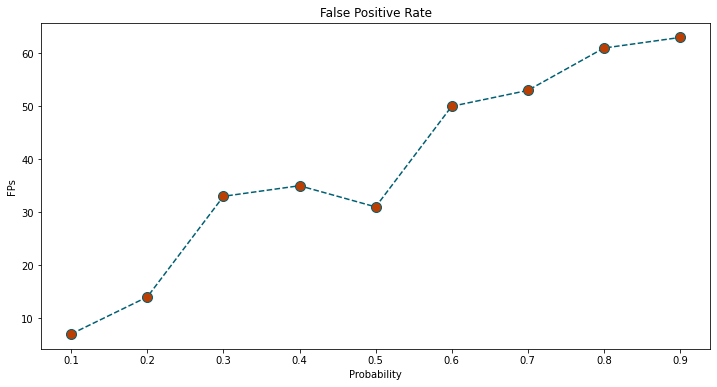

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), FPs, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('False Positive Rate')  
plt.xlabel('Probability')  
plt.ylabel('FPs') 

Text(0, 0.5, 'FNs')

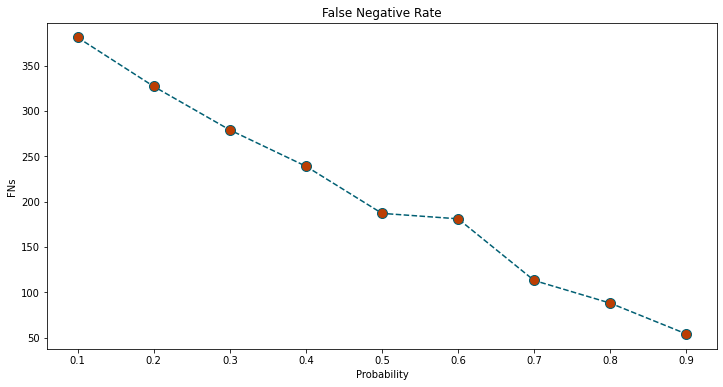

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), FNs, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('False Negative Rate')  
plt.xlabel('Probability')  
plt.ylabel('FNs') 

Text(0, 0.5, 'Accuracy')

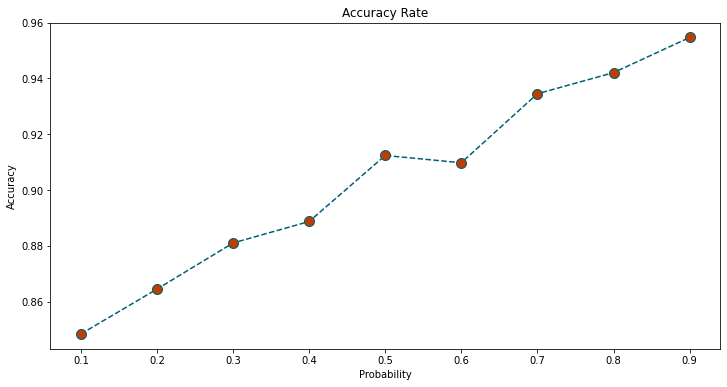

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), accuracys, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('Accuracy Rate')  
plt.xlabel('Probability')  
plt.ylabel('Accuracy') 

# Regressão Logistica

In [ ]:
LR = LogisticRegression(solver='saga',multi_class='multinomial').fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 3, ..., 5, 5, 4], dtype=int8)

In [ ]:
f1_score(y_test, yhat, average='weighted') 

0.691971829132033

In [ ]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
#print("Precision Test:",metrics.precision_score(y_test, yhat))

Accuracy Test: 0.6979483282674772


In [ ]:
y_proba = LR.predict_proba(X_test)

In [ ]:
y_proba[0]

array([0.30618718, 0.02080378, 0.10260448, 0.18019232, 0.00281231,
       0.24244042, 0.14495951])

In [ ]:
print(pd.crosstab(y_test, LR.predict(X_test)))

col_0    0    1    2    3    4    5    6
row_0                                   
0      150   50   44   26    0   70   32
1       23  209   42   59    2   19   16
2       27   50  270    6    7    4   48
3       27   20   16  241    0   24   33
4        0    8   15    0  337    0   18
5       40    6    4    7    0  313   15
6        2    6   19    1    5    4  317


In [ ]:
num_folds = 5
scores = cross_val_score(LR, X_train, y_train, cv = num_folds)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
scores

array([0.69543974, 0.70276873, 0.70928339, 0.69055375, 0.68785656])

In [ ]:
stdevCross = scores.std()
stdevCross

0.00789415175930375

#SVM

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [ ]:
yhat = clf.predict(X_test)
yhat 

array([5, 2, 3, ..., 5, 5, 4], dtype=int8)

In [ ]:
f1_score(y_test, yhat, average='weighted') 

0.8918494286616656

In [ ]:
yhat

array([5, 2, 3, ..., 5, 5, 4], dtype=int8)

In [ ]:
print("Relatório de classificação: \n", metrics.classification_report(y_test, yhat))

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.89      0.75      0.81       372
           1       0.89      0.93      0.91       370
           2       0.91      0.88      0.89       412
           3       0.87      0.85      0.86       361
           4       0.98      0.96      0.97       378
           5       0.88      0.93      0.90       385
           6       0.85      0.96      0.90       354

    accuracy                           0.89      2632
   macro avg       0.89      0.89      0.89      2632
weighted avg       0.89      0.89      0.89      2632



In [ ]:
print(pd.crosstab(y_test, yhat, rownames=['Real'], colnames=['    Predito'], margins=True))

    Predito    0    1    2    3    4    5    6   All
Real                                                
0            278   20   10   17    1   28   18   372
1              7  343    4    7    5    2    2   370
2             11   12  363    8    3    4   11   412
3              7    5   11  307    0   15   16   361
4              0    4    0    3  362    0    9   378
5             11    1    2    9    0  358    4   385
6              0    0   11    3    0    1  339   354
All          314  385  401  354  371  408  399  2632


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.8928571428571429


In [ ]:
num_folds = 5
scores = cross_val_score(clf, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.86807818, 0.88517915, 0.89250814, 0.85586319, 0.87612062])

In [ ]:
stdevCross = scores.std()
stdevCross

0.012837627336444233

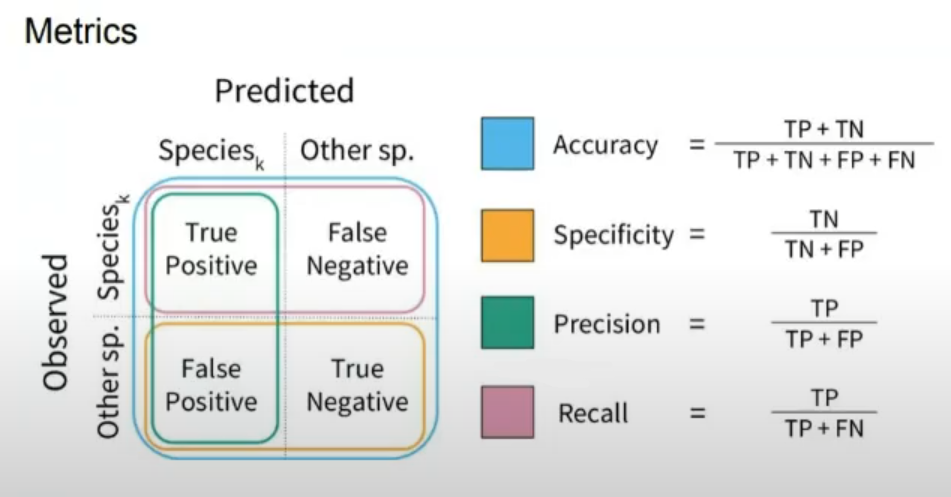